# 3. Machine Learning for Classification

We'll use logistic regression to predict churn


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [7]:
! wget "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
df = pd.read_csv('bank-full.csv',sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df.describe(include= 'all' )

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [15]:
df.education.mode()

0    secondary
Name: education, dtype: object

In [19]:
df.columns



Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
df[['age',  'balance','day',  'campaign', 'pdays','previous',]].corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


In [48]:
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]

In [64]:
df.y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [63]:
df.y = (df.y == 'yes').astype(int)

## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [27]:
from sklearn.model_selection import train_test_split

In [49]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [50]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [51]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [52]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [53]:
cate = [
    'contact',
    'education',
    'housing',
    'poutcome'
]

In [54]:
from sklearn.metrics import mutual_info_score
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.y)
    
mi = df_full_train[cate].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

poutcome     0.029257
contact      0.014164
housing      0.009800
education    0.002458
dtype: float64

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [55]:
df_full_train = df_full_train.reset_index(drop=True)

In [56]:
df_full_train.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [66]:
df_full_train.y.value_counts(normalize=True)

y
no     0.883931
yes    0.116069
Name: proportion, dtype: float64

In [61]:
df_full_train[cate].nunique()

contact      3
education    4
housing      2
poutcome     4
dtype: int64

In [70]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   balance    36168 non-null  int64 
 5   housing    36168 non-null  object
 6   contact    36168 non-null  object
 7   day        36168 non-null  int64 
 8   month      36168 non-null  object
 9   duration   36168 non-null  int64 
 10  campaign   36168 non-null  int64 
 11  pdays      36168 non-null  int64 
 12  previous   36168 non-null  int64 
 13  poutcome   36168 non-null  object
 14  y          36168 non-null  object
dtypes: int64(7), object(8)
memory usage: 4.1+ MB


## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [71]:
from sklearn.feature_extraction import DictVectorizer

In [72]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [73]:
numerical = ['age',  'balance', 'day','duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education','housing', 'contact','month',  'poutcome']

In [74]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [57]:
z = np.linspace(-7, 7, 51)

In [58]:
sigmoid(10000)

1.0

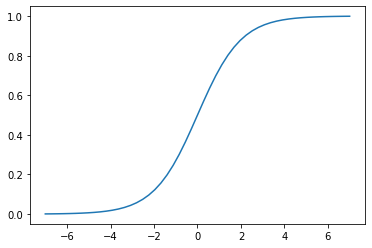

In [59]:
plt.plot(z, sigmoid(z))

In [60]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [61]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [67]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [76]:
model.intercept_[0]

-0.9426328016047085

In [79]:
model.coef_[0].round(3)

array([-2.000e-03,  0.000e+00, -8.000e-02,  2.810e-01,  7.300e-02,
       -1.297e+00,  7.000e-03,  4.000e-03, -4.340e-01, -2.410e-01,
       -6.100e-02, -2.080e-01, -1.050e-01, -8.380e-01,  6.800e-02,
       -2.290e-01, -2.610e-01, -2.990e-01, -8.500e-02,  3.330e-01,
       -3.000e-01, -1.530e-01,  2.580e-01, -1.510e-01,  1.700e-02,
       -1.410e-01, -3.010e-01, -4.590e-01, -1.830e-01,  4.600e-02,
       -7.100e-01,  3.360e-01, -3.380e-01, -1.042e+00, -9.940e-01,
        3.070e-01,  1.359e+00, -4.970e-01, -9.740e-01,  8.000e-01,
        7.650e-01, -1.000e-03, -7.890e-01, -6.230e-01,  1.496e+00,
       -1.025e+00,  6.000e-03])

In [90]:
y_pred = model.predict_proba(X_val)[:, 1]

In [87]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)

score =accuracy_score(y_val,y_pred)

In [88]:
score

0.9015704490157045

In [91]:
y_decision = (y_pred >= 0.5)

In [92]:
(y_val == y_decision).mean()

0.0

In [93]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = y_decision.astype(int)
df_pred['actual'] = y_val

In [94]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [95]:
df_pred.correct.mean()

0.0

In [72]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [73]:
a = [1, 2, 3, 4]
b = 'abcd'

In [74]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [96]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'age': -0.002,
 'balance': 0.0,
 'campaign': -0.08,
 'contact=cellular': 0.281,
 'contact=telephone': 0.073,
 'contact=unknown': -1.297,
 'day': 0.007,
 'duration': 0.004,
 'education=primary': -0.434,
 'education=secondary': -0.241,
 'education=tertiary': -0.061,
 'education=unknown': -0.208,
 'housing=no': -0.105,
 'housing=yes': -0.838,
 'job=admin.': 0.068,
 'job=blue-collar': -0.229,
 'job=entrepreneur': -0.261,
 'job=housemaid': -0.299,
 'job=management': -0.085,
 'job=retired': 0.333,
 'job=self-employed': -0.3,
 'job=services': -0.153,
 'job=student': 0.258,
 'job=technician': -0.151,
 'job=unemployed': 0.017,
 'job=unknown': -0.141,
 'marital=divorced': -0.301,
 'marital=married': -0.459,
 'marital=single': -0.183,
 'month=apr': 0.046,
 'month=aug': -0.71,
 'month=dec': 0.336,
 'month=feb': -0.338,
 'month=jan': -1.042,
 'month=jul': -0.994,
 'month=jun': 0.307,
 'month=mar': 1.359,
 'month=may': -0.497,
 'month=nov': -0.974,
 'month=oct': 0.8,
 'month=sep': 0.765,
 'pdays': 

In [97]:
small = [
    'age',
    'balance',
    'marital',
    'previous'
]

In [98]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'age': 32, 'balance': 1100, 'marital': 'single', 'previous': 0},
 {'age': 38, 'balance': 0, 'marital': 'married', 'previous': 0},
 {'age': 49, 'balance': 3309, 'marital': 'married', 'previous': 0},
 {'age': 37, 'balance': 2410, 'marital': 'married', 'previous': 0},
 {'age': 31, 'balance': 3220, 'marital': 'married', 'previous': 0},
 {'age': 32, 'balance': 11287, 'marital': 'single', 'previous': 0},
 {'age': 35, 'balance': 0, 'marital': 'married', 'previous': 3},
 {'age': 39, 'balance': -17, 'marital': 'married', 'previous': 0},
 {'age': 60, 'balance': 2934, 'marital': 'single', 'previous': 0},
 {'age': 48, 'balance': 3, 'marital': 'married', 'previous': 0}]

In [99]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [100]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [101]:
dv_small.get_feature_names_out()

array(['age', 'balance', 'marital=divorced', 'marital=married',
       'marital=single', 'previous'], dtype=object)

In [102]:
X_train_small = dv_small.transform(dicts_train_small)

In [103]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [104]:
w0 = model_small.intercept_[0]
w0

-0.028383205071518983

In [105]:
w = model_small.coef_[0]
w.round(3)

array([-0.051,  0.   ,  0.003, -0.019, -0.012,  0.106])

In [106]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'age': -0.051,
 'balance': 0.0,
 'marital=divorced': 0.003,
 'marital=married': -0.019,
 'marital=single': -0.012,
 'previous': 0.106}

In [86]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [87]:
sigmoid(_)

0.030090303318277657

## 3.12 Using the model

In [88]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [89]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [90]:
y_full_train = df_full_train.churn.values

In [91]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [93]:
X_test = dv.transform(dicts_test)

In [94]:
y_pred = model.predict_proba(X_test)[:, 1]

In [95]:
churn_decision = (y_pred >= 0.5)

In [96]:
(churn_decision == y_test).mean()

0.815471965933286

In [97]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [98]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [99]:
X_small = dv.transform([customer])

In [100]:
model.predict_proba(X_small)[0, 1]

0.5968852088293909

In [101]:
y_test[-1]

1

## 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

